In [0]:
from imutils import paths
import numpy as np
import cv2
from sklearn.ensemble import IsolationForest
import argparse
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def quantify_image(image, bins=(4, 6, 3)):
	# compute a 3D color histogram over the image and normalize it
	hist = cv2.calcHist([image], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	hist = cv2.normalize(hist, hist).flatten()

	# return the histogram
	return hist

In [0]:
def load_dataset(datasetPath, bins):
	# grab the paths to all images in our dataset directory, then
	# initialize our lists of images
	imagePaths = list(paths.list_images(datasetPath))
	data = []

	# loop over the image paths
	for imagePath in imagePaths:
		# load the image and convert it to the HSV color space
		image = cv2.imread(imagePath)
		image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

		# quantify the image and update the data list
		features = quantify_image(image, bins)
		data.append(features)

	# return our data list as a NumPy array
	return np.array(data)

In [0]:
data_root='/content/drive/My Drive/forest'
data = load_dataset(data_root, bins=(3, 3, 3))

In [8]:
data.shape

(16, 27)

In [9]:
# train the anomaly detection model
print("[INFO] fitting anomaly detection model...")
model = IsolationForest(n_estimators=100, contamination=0.01,
	random_state=42)
model.fit(data)

[INFO] fitting anomaly detection model...


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

anomaly


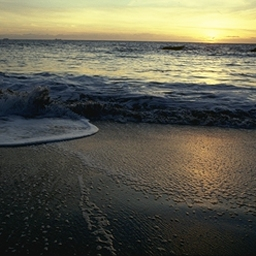

-1

In [12]:
# load the input image, convert it to the HSV color space, and
# quantify the image in the *same manner* as we did during training
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/coast_osun52.jpg")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
features = quantify_image(hsv, bins=(3, 3, 3))

# use the anomaly detector model and extracted features to determine
# if the example image is an anomaly or not
preds = model.predict([features])[0]
label = "anomaly" if preds == -1 else "normal"
color = (0, 0, 255) if preds == -1 else (0, 255, 0)

# draw the predicted label text on the original image
#cv2_imshow.putText(image, label, (10,  25), cv2.FONT_HERSHEY_SIMPLEX,0.7, color, 2)

# display the image
print(label)
cv2_imshow(image)
cv2.waitKey(0)

normal


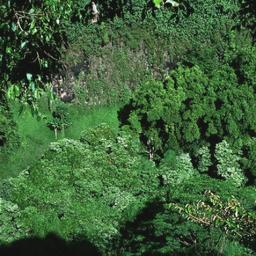

In [14]:
image = cv2.imread("/content/forest_cdmc290.jpg")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
features = quantify_image(hsv, bins=(3, 3, 3))

# use the anomaly detector model and extracted features to determine
# if the example image is an anomaly or not
preds = model.predict([features])[0]
label = "anomaly" if preds == -1 else "normal"
color = (0, 0, 255) if preds == -1 else (0, 255, 0)

# draw the predicted label text on the original image
#cv2_imshow.putText(image, label, (10,  25), cv2.FONT_HERSHEY_SIMPLEX,0.7, color, 2)

# display the image
print(label)
cv2_imshow(image)
